In [879]:
import pandas as pd
names=['username', 'uploads', 'subs', 'views', 'instafollowers', 
       'instafollowing', 'instaposts', 'twitfollowers', 'tweets', 'twitlikes']
data = pd.read_csv('Dataset.csv', sep=';', header=None, names=names)
data = data[data.ne('--').all(1)]
for nm in names[1:]:
    data[nm] = data[nm].apply(lambda x: x.replace(',','') if isinstance(x, str) else x)
    data[nm] = data[nm].apply(lambda x: round(float(x)) if isinstance(x, str) else x)
    data[nm] = data[nm].apply(lambda x: int(x))
    
data['avg_views'] = data.apply(lambda row: row.views // row.uploads, axis=1)

data['size'] = pd.cut(data.views, 4, labels=[1, 2, 3, 4])

reorder=['username', 'views', 'avg_views', 'size', 'uploads', 'subs', 'instafollowers', 
         'instaposts', 'twitfollowers', 'tweets', 'instafollowing', 'twitlikes']
data = data[reorder]

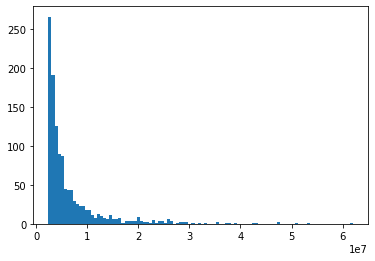

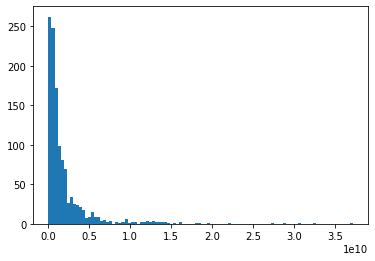

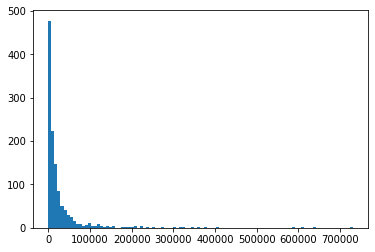

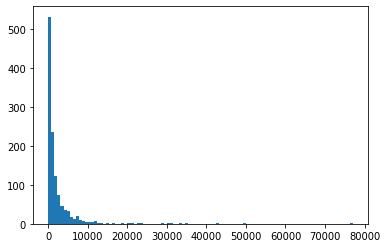

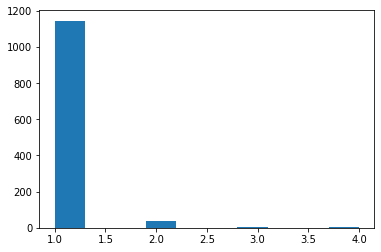

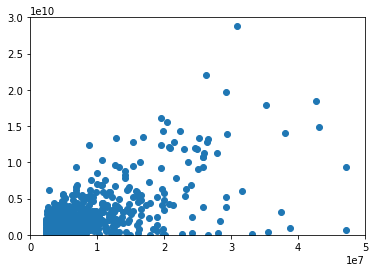

In [880]:
from matplotlib import pyplot as plt
plt.hist(data.subs, bins=100)
plt.show();
plt.hist(data.views, bins=100)
plt.show();
plt.hist(data.tweets, bins=100)
plt.show();
plt.hist(data.instaposts, bins=100)
plt.show();
plt.hist(data['size'])
plt.show();

plt.xlim(0, 50000000)
plt.ylim(0, 30000000000)
plt.scatter(data.subs, data.views)
plt.show();

2160702315.5652347
[ 4.94498524e+04  3.71495706e+02  1.06142574e+05 -3.09653583e+01
 -5.49969365e+03 -6.22169838e+01]


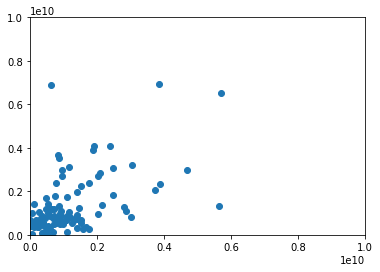

In [846]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

X = data[['uploads', 'subs', 'instaposts', 'instafollowers', 'tweets', 'twitfollowers']].values
Y = np.ravel(data[['views']])

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.1)

linreg = LinearRegression()
linreg.fit(train_X, train_Y)

linreg_pred = linreg.predict(test_X)
print(np.sqrt(metrics.mean_squared_error(test_Y, linreg_pred)))

print(linreg.coef_)

_ = plt.xlim(0, 10000000000)
_ = plt.ylim(0, 10000000000)
plt.scatter(test_Y, linreg_pred)
plt.show();

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

1657351467.0705605

(0, 10000000000)

(0, 10000000000)

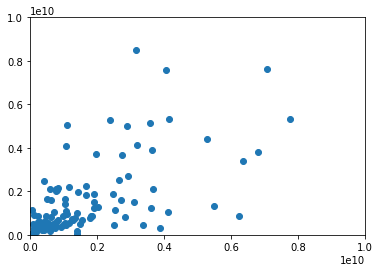

In [766]:
from sklearn import tree

dectree = tree.DecisionTreeRegressor()
dectree.fit(train_X, train_Y)

dectree_pred = dectree.predict(test_X)
np.sqrt(metrics.mean_squared_error(test_Y, dectree_pred))


plt.xlim(0, 10000000000)
plt.ylim(0, 10000000000)
plt.scatter(test_Y, dectree_pred)
plt.show()

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

1741598025.79057

(0, 10000000000)

(0, 10000000000)

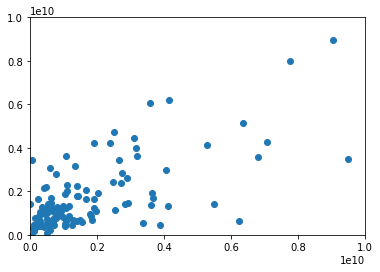

In [768]:
from sklearn.linear_model import BayesianRidge

ridgereg = BayesianRidge()
ridgereg.fit(train_X, train_Y)

ridgereg_pred = ridgereg.predict(test_X)
np.sqrt(metrics.mean_squared_error(test_Y, ridgereg_pred))

plt.xlim(0, 10000000000)
plt.ylim(0, 10000000000)
plt.scatter(test_Y, ridgereg_pred)
plt.show()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

2485737378.466718

(0, 10000000000)

(0, 10000000000)

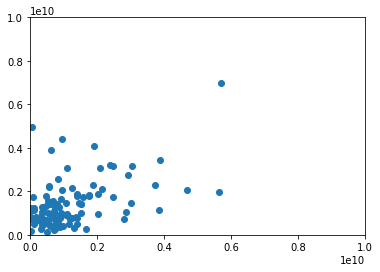

In [851]:
from sklearn.neighbors import KNeighborsRegressor

kneighbour = KNeighborsRegressor(n_neighbors=5)
kneighbour.fit(train_X, train_Y)

kneighbour_pred = kneighbour.predict(test_X)
np.sqrt(metrics.mean_squared_error(test_Y, kneighbour_pred))

plt.xlim(0, 10000000000)
plt.ylim(0, 10000000000)
plt.scatter(test_Y, kneighbour_pred)
plt.show()

In [969]:
from sklearn.linear_model import Perceptron

cat_X = data[['uploads', 'subs', 'instaposts', 'instafollowers', 'tweets', 'twitfollowers']].values
cat_Y = np.ravel(data[['size']])

cat_train_X, cat_test_X, cat_train_Y, cat_test_Y = train_test_split(cat_X, cat_Y, test_size=0.1)

perc = Perceptron()
perc.fit(cat_train_X, cat_train_Y)

perc.score(cat_test_X, cat_test_Y)
perc.coef_

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

0.9495798319327731

array([[-3.6366900e+05,  9.1100050e+06,  7.9512000e+04,  3.3795804e+07,
         2.4378755e+07,  6.8389790e+06],
       [-1.5328960e+06, -9.3100070e+06,  6.1630000e+03, -8.4780501e+07,
        -2.2978868e+07, -1.9464207e+07],
       [ 1.0285500e+05, -1.4699990e+06, -3.1089600e+05, -8.0465873e+07,
        -4.6311940e+06, -6.7764415e+07],
       [ 1.8118860e+06, -1.1999900e+05,  7.4609000e+04, -1.7030503e+07,
         6.1693600e+05, -2.0065641e+07]])

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(cat_train_X, cat_train_Y)

logreg.score(cat_test_X, cat_test_Y)
logreg.coef_

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(cat_train_X, cat_train_Y)

svm.score(cat_test_X, cat_test_Y)
svm.coef_